In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from scipy.optimize import curve_fit
import numpy as np

In [2]:
res = xlrd.open_workbook('result.xlsx')

In [3]:
tabler = res.sheets()[0]

In [4]:
inv_al = tabler.col_values(6)
inv_copper = tabler.col_values(12)
inv_lead = tabler.col_values(18)
inv_nickel = tabler.col_values(24)
inv_zinc = tabler.col_values(30)
inv_tin = tabler.col_values(36)

vol_al = tabler.col_values(5)
vol_copper = tabler.col_values(11)
vol_lead = tabler.col_values(17)
vol_nickel = tabler.col_values(23)
vol_zinc = tabler.col_values(29)
vol_tin = tabler.col_values(35)

spd_al = tabler.col_values(4)
spd_copper = tabler.col_values(10)
spd_lead = tabler.col_values(16)
spd_nickel = tabler.col_values(22)
spd_zinc = tabler.col_values(28)
spd_tin = tabler.col_values(34)

print(type(spd_tin))


<class 'list'>


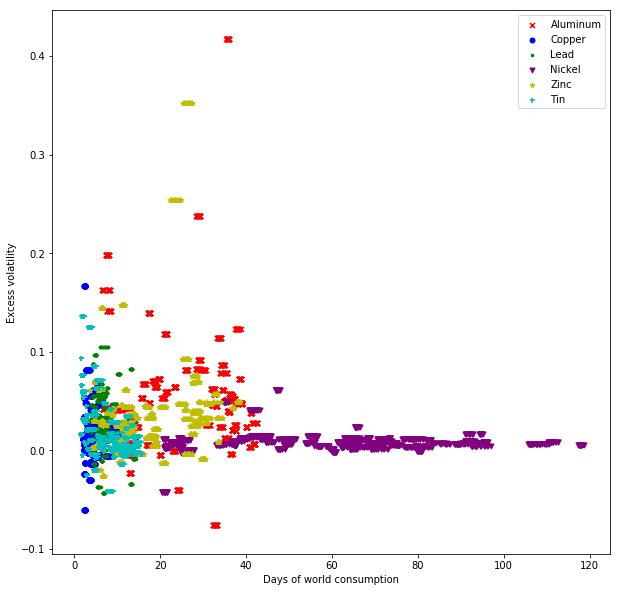

In [75]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

#sValue = inv_al*10
al1 = ax1.scatter(inv_al, vol_al,c='r', s=25, marker="x")
copper1 = ax1.scatter(inv_copper, vol_copper,c='b', s=25 ,marker="o")
lead1 = ax1.scatter(inv_lead, vol_lead ,c='g',  s=25 ,marker=".")
nickel1 = ax1.scatter(inv_nickel, vol_nickel,c='#800080',s=25,  marker="v")
zinc1 = ax1.scatter(inv_zinc, vol_zinc, c='y', s=25, marker="*")
tin1 = ax1.scatter(inv_tin, vol_tin, c='c',s=25 , marker="+")
plt.legend([al1, copper1, lead1, nickel1, zinc1, tin1], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')
plt.xlabel('Days of world consumption')
plt.ylabel('Excess volatility')
#ax1.set_title('Spot volatility vs. inventory',fontsize=12)
plt.savefig('fig_vol.jpg')
plt.show()


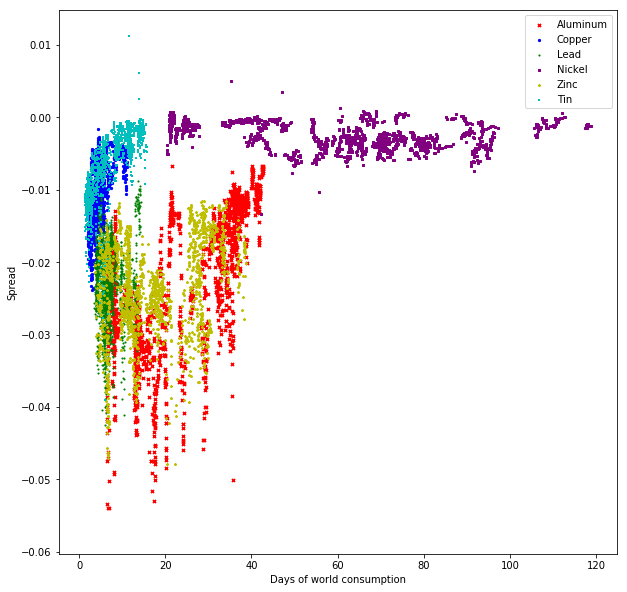

In [76]:
fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
#sValue = inv_al*10
al2=ax2.scatter(inv_al, spd_al,c='r', s=10, marker="x", label='first')
copper2=ax2.scatter(inv_copper, spd_copper, c='b',s=5 ,marker="o", label='second')
lead2 =ax2.scatter(inv_lead, spd_lead ,c='g', s=5 ,marker=".", label='third')
nickel2 = ax2.scatter(inv_nickel, spd_nickel,c='#800080',s=5,  marker="s", label='fourth')
zinc2 = ax2.scatter(inv_zinc, spd_zinc, c='y',s=5, marker="*", label='fifth')
tin2 = ax2.scatter(inv_tin, spd_tin, c='c',s=5 , marker="+", label='fifth')
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')
plt.xlabel('Days of world consumption')
plt.ylabel('Spread')
plt.savefig('fig_spd.jpg')
plt.show()

In [9]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [10]:
popt_spd_al, pcov_spd_al = curve_fit(func, inv_al, spd_al)
popt_spd_copper, pcov_spd_copper = curve_fit(func, inv_copper, spd_copper)
popt_spd_lead, pcov_spd_lead = curve_fit(func, inv_lead, spd_lead)
popt_spd_nickel, pcov_spd_nickel = curve_fit(func, inv_nickel, spd_nickel)
popt_spd_zinc, pcov_spd_zinc = curve_fit(func, inv_zinc, spd_zinc)
popt_spd_tin, pcov_spd_tin = curve_fit(func, inv_tin, spd_tin)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [12]:
y_spd_al = [func(i,popt_spd_al[0],popt_spd_al[1],popt_spd_al[2]) for i in inv_al]
y_spd_copper = [func(i,popt_spd_copper[0],popt_spd_copper[1],popt_spd_copper[2]) for i in inv_copper]
y_spd_lead = [func(i,popt_spd_lead[0],popt_spd_lead[1],popt_spd_lead[2]) for i in inv_lead]
y_spd_nickel = [func(i,popt_spd_nickel[0],popt_spd_nickel[1],popt_spd_nickel[2]) for i in inv_nickel]
y_spd_zinc = [func(i,popt_spd_zinc[0],popt_spd_zinc[1],popt_spd_zinc[2]) for i in inv_zinc]
y_spd_tin = [func(i,popt_spd_tin[0],popt_spd_tin[1],popt_spd_tin[2]) for i in inv_tin]

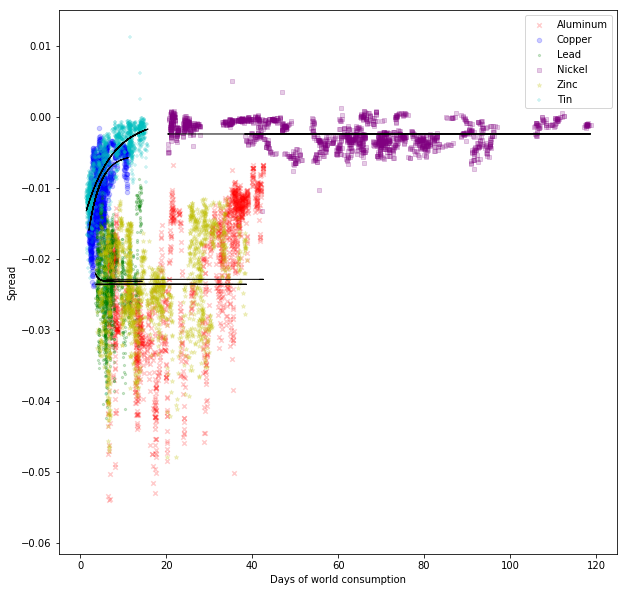

In [77]:
fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
#sValue = inv_al*10
al2=ax2.scatter(inv_al, spd_al,c='r', s=20, marker="x", label='first' ,alpha=.2)
copper2=ax2.scatter(inv_copper, spd_copper, c='b',s=20,marker="o", label='second',alpha=.2)
lead2 =ax2.scatter(inv_lead, spd_lead ,c='g', s=20 ,marker=".", label='third',alpha=.2)
nickel2 = ax2.scatter(inv_nickel, spd_nickel,c='#800080',s=20,  marker="s", label='fourth',alpha=.2)
zinc2 = ax2.scatter(inv_zinc, spd_zinc, c='y',s=20, marker="*", label='fifth',alpha=.2)
tin2 = ax2.scatter(inv_tin, spd_tin, c='c',s=20 , marker="+", label='fifth',alpha=.2)
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')

al3=ax2.plot(inv_al, y_spd_al,c='k', lw=1)
copper3=ax2.plot(inv_copper, y_spd_copper, c='k',  lw=1)
lead3 =ax2.plot(inv_lead, y_spd_lead ,c='k', lw=1)
nickel3 = ax2.plot(inv_nickel, y_spd_nickel,c='k' ,lw=1 )
zinc3 = ax2.plot(inv_zinc, y_spd_zinc, c='k',  lw=1)
tin3 = ax2.plot(inv_tin, y_spd_tin, c='k', lw=1)
#plt.legend([al3, copper3, lead3, nickel3, zinc3, tin3], ['Aluminum', 'Copper', 'Lead', 'Nickel1', 'Zinc', 'Tin'], loc='best')

plt.xlabel('Days of world consumption')
plt.ylabel('Spread')
plt.savefig('fit_fig_spd.jpg')
plt.show()

In [28]:
popt_vol_al, pcov_vol_al = curve_fit(func, inv_al, vol_al)
popt_vol_copper, pcov_vol_copper = curve_fit(func, inv_copper, vol_copper)
popt_vol_lead, pcov_vol_lead = curve_fit(func, inv_lead, vol_lead)
popt_vol_nickel, pcov_vol_nickel = curve_fit(func, inv_nickel, vol_nickel)
popt_vol_zinc, pcov_vol_zinc = curve_fit(func, inv_zinc, vol_zinc)
popt_vol_tin, pcov_vol_tin = curve_fit(func, inv_tin, vol_tin)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [35]:

y_vol_al = [func(i,popt_vol_al[0],popt_vol_al[1],popt_vol_al[2]) for i in inv_al]
y_vol_copper = [func(i,popt_vol_copper[0],popt_vol_copper[1],popt_vol_copper[2]) for i in inv_copper]
y_vol_lead = [func(i,popt_vol_lead[0],popt_vol_lead[1],popt_vol_lead[2]) for i in inv_lead]
y_vol_nickel = [func(i,popt_vol_nickel[0],popt_vol_nickel[1],popt_vol_nickel[2]) for i in inv_nickel]
y_vol_zinc = [func(i,popt_vol_zinc[0],popt_vol_zinc[1],popt_vol_zinc[2]) for i in inv_zinc]
y_vol_tin = [func(i,popt_vol_tin[0],popt_vol_tin[1],popt_vol_tin[2]) for i in inv_tin]

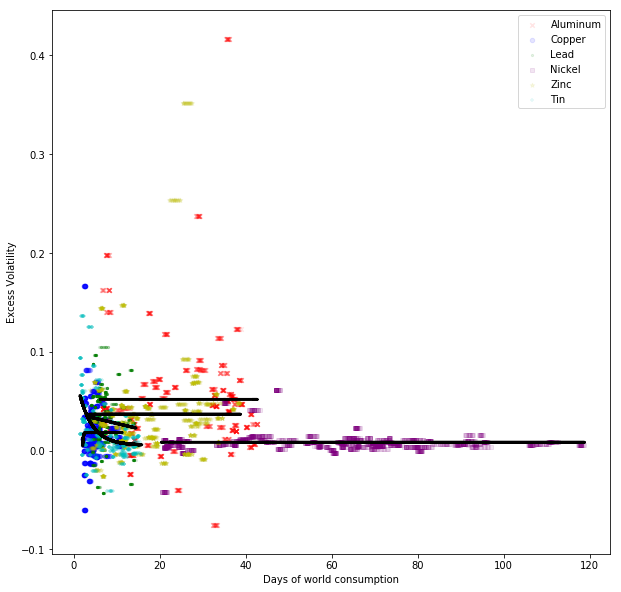

In [78]:
fig2 = plt.figure(figsize=(10,10))
ax3 = fig2.add_subplot(111)
#sValue = inv_al*10
al2=ax3.scatter(inv_al, vol_al,c='r', s=20, marker="x",alpha=.1)
copper2=ax3.scatter(inv_copper, vol_copper, c='b',s=20,marker="o", alpha=.1)
lead2 =ax3.scatter(inv_lead, vol_lead ,c='g', s=20 ,marker=".", alpha=.1)
nickel2 = ax3.scatter(inv_nickel, vol_nickel,c='#800080',s=20,  marker="s", alpha=.1)
zinc2 = ax3.scatter(inv_zinc, vol_zinc, c='y',s=20, marker="*", alpha=.1)
tin2 = ax3.scatter(inv_tin, vol_tin, c='c',s=20 , marker="+", alpha=.1)
plt.legend([al2, copper2, lead2, nickel2, zinc2, tin2], ['Aluminum', 'Copper', 'Lead', 'Nickel', 'Zinc', 'Tin'], loc='best')

al3=ax3.plot(inv_al, y_vol_al,c='k', lw=3)
copper3=ax3.plot(inv_copper, y_vol_copper, c='k',  lw=3)
lead3 =ax3.plot(inv_lead, y_vol_lead ,c='k', lw=3)
nickel3 = ax3.plot(inv_nickel, y_vol_nickel,c='k' ,lw=3 )
zinc3 = ax3.plot(inv_zinc, y_vol_zinc, c='k',  lw=3)
tin3 = ax3.plot(inv_tin, y_vol_tin, c='k', lw=3)
#plt.legend([al3, copper3, lead3, nickel3, zinc3, tin3], ['Aluminum', 'Copper', 'Lead', 'Nickel1', 'Zinc', 'Tin'], loc='best')

plt.xlabel('Days of world consumption')
plt.ylabel('Excess Volatility')
plt.savefig('fit_fig_val.jpg')
plt.show()


In [69]:
imp_spd_al = []
imp_spd_copper = []
imp_spd_lead= []
imp_spd_nickel = []
imp_spd_zinc = []
imp_spd_tin = []
h_spd = []
i = 0
while i < len(inv_al):
    imp_spd_al.append(spd_al[i]/y_spd_al[i])
    imp_spd_copper.append(spd_copper[i]/y_spd_copper[i])
    imp_spd_lead.append(spd_lead[i]/y_spd_lead[i])
    imp_spd_nickel.append(spd_nickel[i]/y_spd_nickel[i])
    imp_spd_zinc.append(spd_zinc[i]/y_spd_zinc[i])
    imp_spd_tin.append(spd_tin[i]/y_spd_tin[i])
    h_spd.append(1)
    i = i+1

In [54]:
print(len(inv_al))

1685


In [70]:
interval = (2018-2012)/1685
i = []
j = 0
while j < len(inv_al):
    i.append(2012+j*interval)
    j = j+1

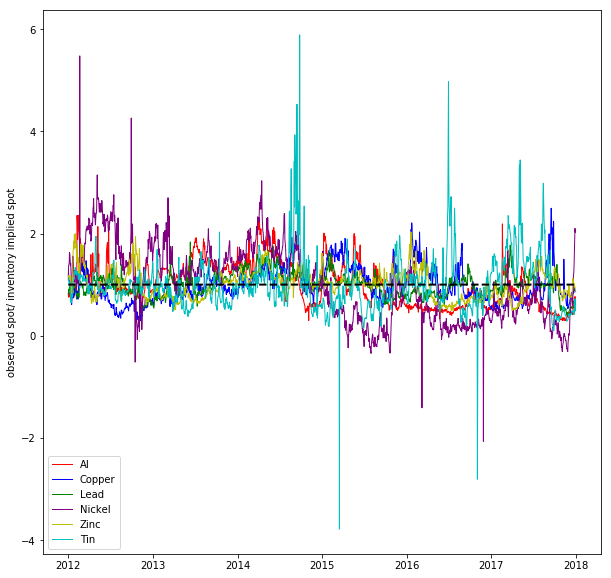

In [72]:


fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.add_subplot(111)

al4=ax4.plot(i, imp_spd_al,c='r', lw=1, label = 'Al')
copper4=ax4.plot(i, imp_spd_copper, c='b',  lw=1, label = 'Copper')
lead4 =ax4.plot(i, imp_spd_lead ,c='g', lw=1, label = 'Lead')
nickel4 = ax4.plot(i, imp_spd_nickel,c='#800080' ,lw=1 , label = 'Nickel')
zinc4 = ax4.plot(i, imp_spd_zinc, c='y',  lw=1, label = 'Zinc')
tin4 = ax4.plot(i, imp_spd_tin, c='c', lw=1, label = 'Tin')
ax4.plot(i, h_spd, c = 'k', lw=2, ls='--')
#plt.vlines(1,2012,2018)
ax4.legend(loc='lower left')
#plt.legend([al4, copper4, lead4, nickel4, zinc4, tin4], ['Aluminum', 'Copper', 'Lead', 'Nickel1', 'Zinc', 'Tin'], loc='best')
plt.ylabel('observed spot/ inventory implied spot')
plt.savefig('imp_fig_spd.jpg')
plt.show()